# ASSIGNMENT_3

In [2]:
# install and import necessary libraries.

!pip install contractions
!pip install textblob


import os
import pandas as pd
import zipfile

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
                                
import nltk                                             # Import Natural Language Tool-Kit.

# Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt                         
import seaborn as sns
from textblob import TextBlob

import spacy
from spacy import displacy

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from mlxtend.plotting import plot_confusion_matrix

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
import os
import pandas as pd
import zipfile

In [4]:
# Unzipping the dataset
with zipfile.ZipFile('C:/Users/Owner/Desktop/000_USD_AAI_520_NLP/WEEK_3/News_Articles.zip', 'r') as zip_ref:
    zip_ref.extractall('C:/Users/Owner/Desktop/000_USD_AAI_520_NLP/WEEK_3/News_Articles')

# Path to the extracted folder
base_path = 'C:/Users/Owner/Desktop/000_USD_AAI_520_NLP/WEEK_3/News_Articles'

In [5]:
# Initializing empty lists to store category and text data
categories = []
texts = []

# Iterating through each category folder
for category in os.listdir(base_path):
    category_path = os.path.join(base_path, category)
    
    # Checking if the path points to a directory (i.e., one of the category folders)
    if os.path.isdir(category_path):
        
        # Iterating through each text file in the category folder
        for filename in os.listdir(category_path):
            file_path = os.path.join(category_path, filename)
            
            # Reading the content of the text file
            with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
                text = file.read()
                texts.append(text)
                categories.append(category)

# Creating a dataframe from the collected data
data = pd.DataFrame({
    'Category': categories,
    'Text': texts
})

data.head()


,Category,Text
0,business,Ad sales boost Time Warner profit\n\nQuarterly...
1,business,Dollar gains on Greenspan speech\n\nThe dollar...
2,business,Yukos unit buyer faces loan claim\n\nThe owner...
3,business,High fuel prices hit BA's profits\n\nBritish A...
4,business,Pernod takeover talk lifts Domecq\n\nShares in...


In [6]:
data.tail()

,Category,Text
2220,tech,BT program to beat dialler scams\n\nBT is intr...
2221,tech,Spam e-mails tempt net shoppers\n\nComputer us...
2222,tech,Be careful how you code\n\nA new European dire...
2223,tech,US cyber security chief resigns\n\nThe man mak...
2224,tech,Losing yourself in online gaming\n\nOnline rol...


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  2225 non-null   object
 1   Text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [8]:
data.shape

(2225, 2)

In [9]:
#Basic statistical details like percentile, mean, std etc. of a data frame of numeric values. 
data.describe()

,Category,Text
count,2225,2225
unique,5,2127
top,sport,Ray DVD beats box office takings\n\nOscar-nomi...
freq,511,2


In [10]:
#Number in each category

data.Category.value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: Category, dtype: int64

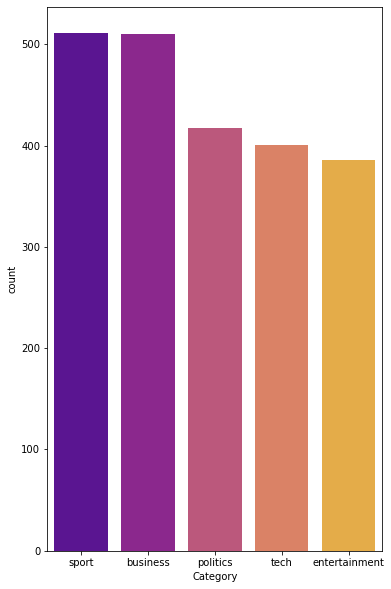

In [11]:
plt.figure(figsize=(6,10))
sns.countplot(data['Category'], order =data.Category.value_counts().index,palette= 'plasma')
plt.show()

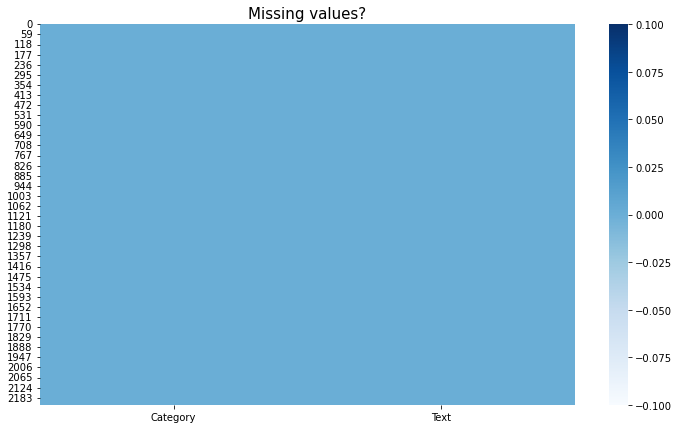

In [12]:
#Visualization of missing value using heatmap
plt.figure(figsize=(12,7))
sns.heatmap(data.isnull(), cmap = "Blues")                       
plt.title("Missing values?", fontsize = 15)
plt.show()

In [13]:
# check the missing values for all the columns
def return_missing_values(data_frame):
    missing_values = data_frame.isnull().sum()
    missing_values = missing_values[missing_values>0]
    missing_values.sort_values(inplace=True)
    return missing_values

#plot the count of missing values in every column 
def plot_missing_values(data_frame):
    missing_values = return_missing_values(data_frame)
    missing_values = missing_values.to_frame()
    missing_values.columns = ['count']
    missing_values.index.names = ['Name']
    missing_values['Name'] = missing_values.index
    sns.set(style='darkgrid')
    sns.barplot(x='Name', y='count', data=missing_values)
    plt.title('Bar plot for Null Values in each column')
    plt.xticks(rotation=90)
    plt.show()

In [14]:
# get the count of missing values in every column of the dataframe
return_missing_values(data)

Series([], dtype: int64)

# Unique Values

In [15]:
#get the unique values of every column
def return_unique_values(data_frame):
    unique_dataframe = pd.DataFrame()
    unique_dataframe['Features'] = data_frame.columns
    uniques = []
    for col in data_frame.columns:
        u = data_frame[col].nunique()
        uniques.append(u)
    unique_dataframe['Uniques'] = uniques
    return unique_dataframe

In [16]:

unidf = return_unique_values(data)
print(unidf)

   Features  Uniques
0  Category        5
1      Text     2127


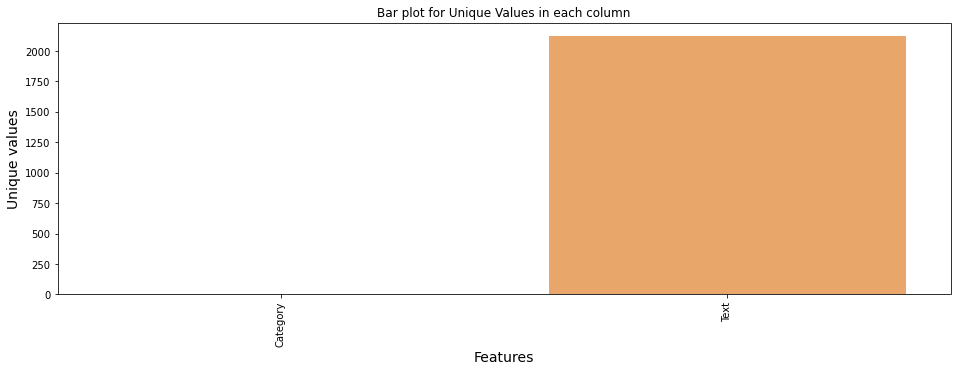

In [17]:
# plot the count of unique values in every column
f, ax = plt.subplots(1,1, figsize=(16,5))
sns.barplot(x=unidf['Features'], y=unidf['Uniques'], alpha=0.7)
plt.title('Bar plot for Unique Values in each column')
plt.ylabel('Unique values', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.xticks(rotation=90)
plt.show()

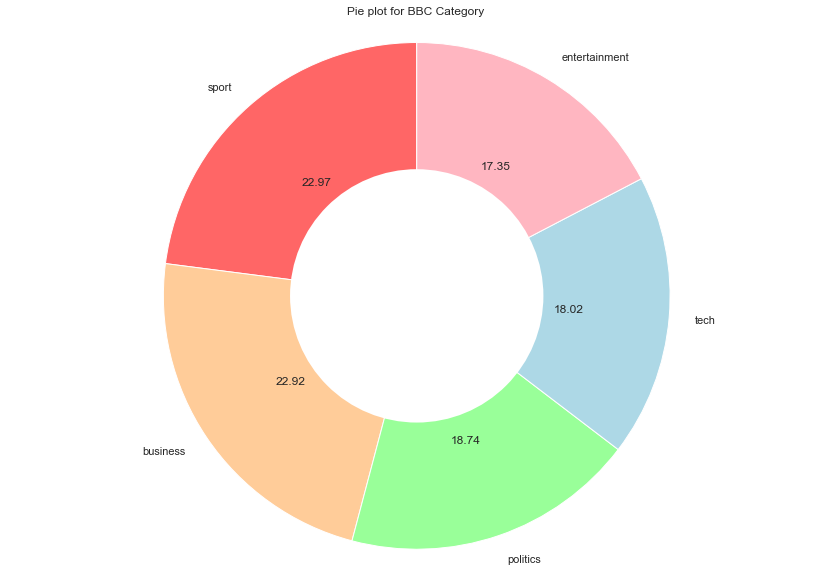

In [18]:
#plot for BBC News Articles Categories
#Using matplotlib
colors = ['#ff6666', '#ffcc99', '#99ff99', '#ADD8E6','#FFB6C1']

sns.set(rc={'figure.figsize':(11.7,8.27)})
plot = plt.pie(data['Category'].value_counts(), labels=data['Category'].value_counts().index, colors=colors, startangle=90,  autopct='%.2f')
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Pie plot for BBC Category')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Distribution of words for each class before Text Preprocessing

In [19]:
#get the no of words in every text
data['word_count'] = [len(t.split()) for t in data.Text]
data.head()

,Category,Text,word_count
0,business,Ad sales boost Time Warner profit\n\nQuarterly...,421
1,business,Dollar gains on Greenspan speech\n\nThe dollar...,384
2,business,Yukos unit buyer faces loan claim\n\nThe owner...,264
3,business,High fuel prices hit BA's profits\n\nBritish A...,406
4,business,Pernod takeover talk lifts Domecq\n\nShares in...,265


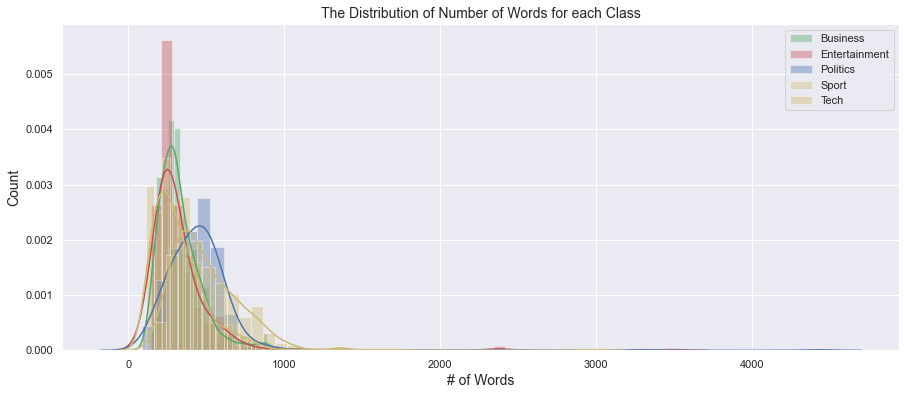

In [20]:
#get the distribution of words for each class
fig = plt.figure(figsize = (15,6))
sns.distplot(data['word_count'][data['Category']=='business'], color='g', label = 'Business')
sns.distplot(data['word_count'][data['Category']=='entertainment'], color='r', label = 'Entertainment')
sns.distplot(data['word_count'][data['Category']=='politics'], color='b', label = 'Politics')
sns.distplot(data['word_count'][data['Category']=='sport'], color='y', label = 'Sport')
sns.distplot(data['word_count'][data['Category']=='tech'], color='y', label = 'Tech')

plt.legend(loc='best')
plt.xlabel('# of Words', size = 14)
plt.ylabel('Count', size = 14)
plt.title('The Distribution of Number of Words for each Class', fontsize = 14)
plt.show()

# Word Cloud for Business Before Text Prepocessing

In [21]:
from wordcloud import WordCloud,STOPWORDS

In [22]:
business=data[data['Category']=='business']
words = ' '.join(business['Text'])
cleaned_word_1 = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [23]:
wordcloud_1 = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word_1)

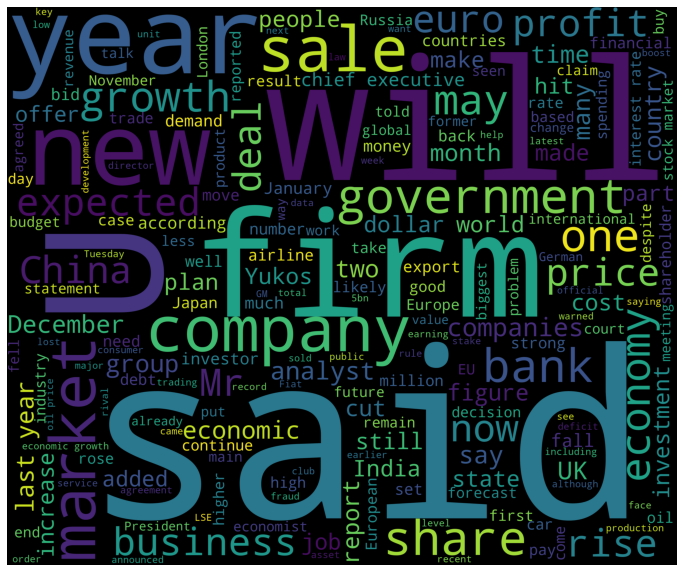

In [24]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud_1)
plt.axis('off')
plt.show()

# Word Cloud for Entertainment Before Text Prepocessing

In [25]:
entertainment=data[data['Category']=='entertainment']
words = ' '.join(entertainment['Text'])
cleaned_word_2 = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [26]:
wordcloud_2 = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word_2)

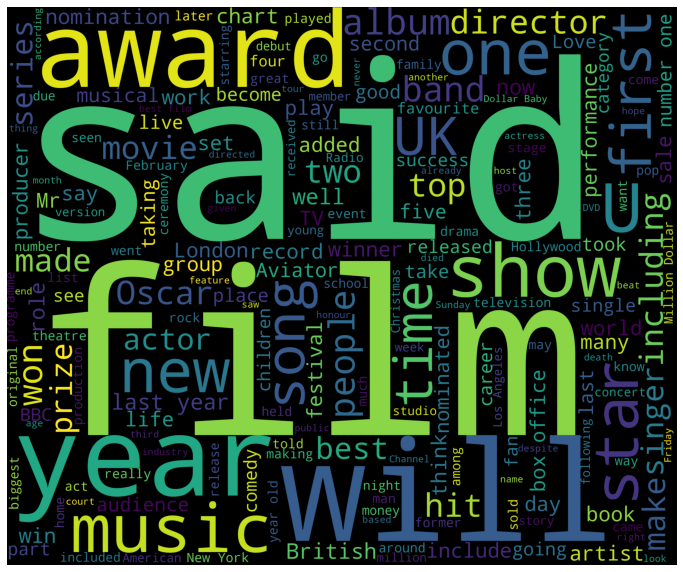

In [27]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud_2)
plt.axis('off')
plt.show()

# Word Cloud for POLITICS Before Text Prepocessing

In [28]:
politics=data[data['Category']=='politics']
words = ' '.join(politics['Text'])
cleaned_word_3 = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [29]:
wordcloud_3 = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word_3)

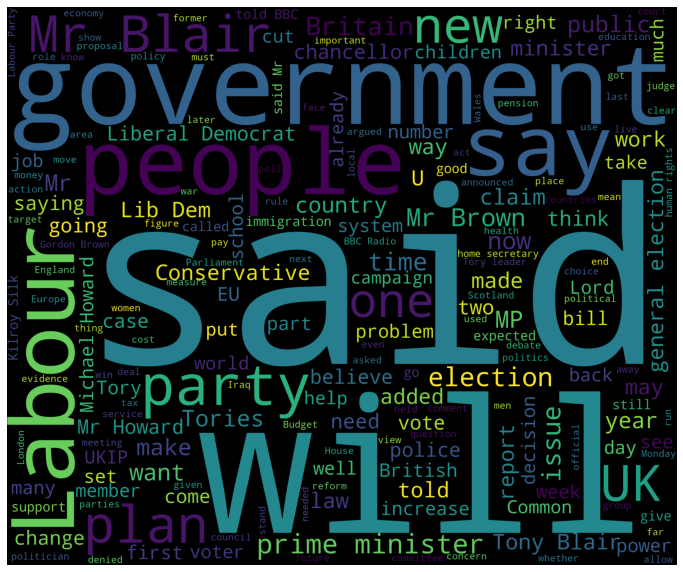

In [30]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud_3)
plt.axis('off')
plt.show()

# Word Cloud for SPORT Before Text Prepocessing

In [31]:
sport=data[data['Category']=='sport']
words = ' '.join(sport['Text'])
cleaned_word_4 = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [32]:
wordcloud_4 = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word_4)

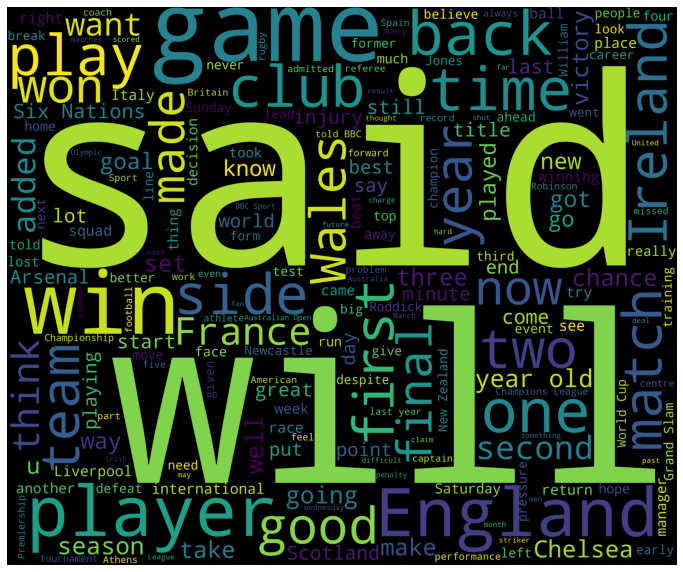

In [33]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud_4)
plt.axis('off')
plt.show()

# Word Cloud for TECH Before Text Prepocessing

In [34]:
tech=data[data['Category']=='tech']
words = ' '.join(tech['Text'])
cleaned_word_5 = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [35]:
wordcloud_5 = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word_5)

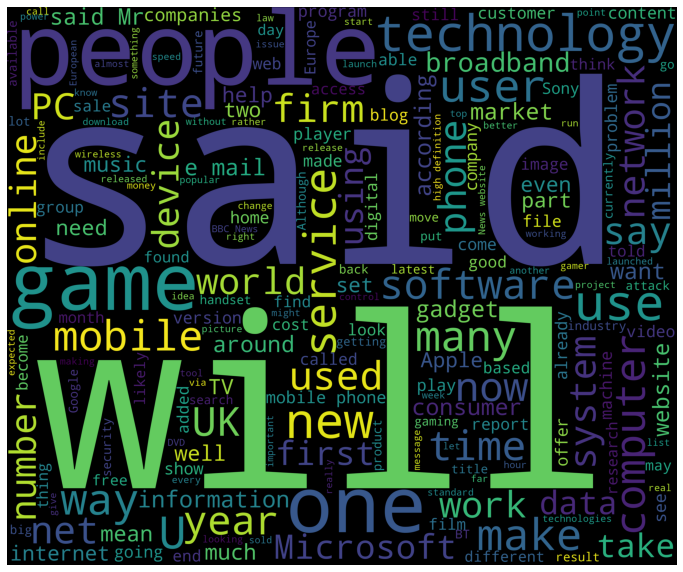

In [36]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud_5)
plt.axis('off')
plt.show()

In [37]:
blob = TextBlob(cleaned_word_5)
word_freq = blob.word_counts

for word, freq in word_freq.items():
    print(f"{word}: {freq}")

ink: 35
helps: 17
drive: 74
democracy: 2
in: 3465
asia: 21
the: 11695
kyrgyz: 4
republic: 13
a: 4345
small: 89
mountainous: 2
state: 35
of: 5353
former: 19
soviet: 2
is: 2542
using: 238
invisible: 9
and: 4715
ultraviolet: 3
readers: 26
country: 40
s: 1237
elections: 13
as: 1413
part: 145
to: 6336
prevent: 19
multiple: 12
voting: 8
this: 754
new: 517
technology: 504
causing: 4
both: 98
worries: 7
guarded: 1
optimism: 1
among: 55
different: 149
sectors: 4
population: 29
an: 650
effort: 12
live: 35
up: 533
its: 613
reputation: 4
1990s: 5
island: 8
president: 60
askar: 1
akaev: 1
pushed: 10
through: 133
law: 67
requiring: 5
use: 379
during: 68
upcoming: 8
parliamentary: 4
presidential: 8
us: 371
government: 49
agreed: 25
fund: 13
all: 370
expenses: 3
associated: 13
with: 1258
decision: 28
seen: 70
by: 1127
many: 356
experts: 49
backsliding: 1
from: 743
high: 75
point: 57
it: 2242
reached: 12
mid-1990s: 2
hastily: 1
referendum: 1
2003: 59
reducing: 5
legislative: 1
branch: 1
one: 498
chambe

leaving: 7
lower: 17
cancel: 4
subscription: 25
25p: 2
alternative: 13
hardly: 12
swapping: 8
tied: 3
12-month: 2
contracts: 13
surveyed: 7
unable: 7
swap: 17
discovered: 10
huge: 82
withholding: 2
breaks: 9
voluntary: 6
ofcom: 22
vast: 21
bewildering: 3
array: 10
packages: 7
coming: 39
advises: 3
shop: 10
carefully: 11
stick: 10
ripped: 2
sun: 26
microsystems: 2
pay-as-you-go: 2
rent: 9
grid: 18
1: 18
53p: 2
maintained: 7
so-called: 43
buzz: 5
believes: 26
capacity: 36
commodity: 2
likened: 3
mature: 2
utilities: 3
jonathan: 7
schwartz: 6
ours: 2
buck: 5
webcast: 2
launching: 10
quarterly: 3
event: 14
california: 27
persuade: 7
managers: 4
oil: 4
gas: 2
financial: 32
5,000: 4
demonstration: 2
protein: 5
folding: 4
experiment: 8
simultaneously: 10
£6.30: 2
relies: 7
solaris: 2
owned: 5
premises: 4
idle: 5
shipping: 7
develop: 26
argues: 10
on-demand: 3
gaps: 4
indian: 5
voice: 58
tata: 6
teleservices: 1
offices: 11
bridges: 6
4km: 2
locations: 5
geography: 2
dig: 2
ground: 11
lay: 2
pi

tv-quality: 2
norm: 1
westminster: 1
lord: 11
currie: 3
super-regulator: 1
protecting: 9
remit: 1
disquiet: 1
speeches: 6
hinted: 3
ispa: 1
possibility: 11
arise: 2
blur: 6
balance: 6
regulate: 6
self-regulation: 1
suggest: 12
itv: 2
burke: 7
spoke: 1
platforms: 8
risque: 1
celebrity: 2
chefs: 1
serving: 1
expletives: 1
dinners: 1
lengths: 1
maybe: 8
mere: 5
conduits: 1
ayers: 2
afoot: 1
surfers: 16
eastenders: 3
quantity: 1
herald: 2
inappropriate: 5
viewed: 4
mp: 1
allan: 4
liberal: 1
democrat: 2
lie: 3
somewhere: 5
cries: 1
offline: 12
departed: 1
reign: 1
watershed: 1
flock: 1
bloggies: 5
nominations: 3
sunday: 7
temporarily: 1
nominated: 3
regional: 6
best-kept-secret: 1
naming: 1
nikolai: 1
nolan: 2
surprised: 12
crowded: 4
guess: 3
finalists: 1
south-east: 2
pretty: 14
timely: 1
wide-ranging: 1
covering: 3
quirky: 1
coveted: 2
gawker: 1
fish: 2
bicycle: 1
wonkette: 1
boing: 2
gothamist: 1
greenfairydotcom: 1
londonist: 1
hicksdesign: 1
plasticbag: 1
tube: 1
nominees: 1
irish: 17

compressing: 2
photo-real: 2
limiting: 4
thrilled: 2
high-resolution: 5
mgm: 4
buena: 3
vista: 3
dell: 10
phillips: 2
paramount: 7
cardwell: 4
dependability: 2
courting: 4
file-swappers: 2
file-swapping: 5
avoids: 2
pitfalls: 2
exeem: 20
shutting: 4
nickname: 4
sloncek: 12
novastream: 4
toward: 3
centrally: 3
appearing: 6
suprnova: 9
swarm: 2
kitts: 2
nevis: 2
johan: 2
pouwelse: 6
delft: 4
pollution: 2
rating: 3
flawed: 2
insert: 2
ratings: 2
labels: 8
undermine: 3
fakes: 2
tension: 4
integrity: 3
moderation: 2
migrated: 2
listing: 2
bubbling: 1
joysticks: 1
gamepads: 1
technically: 7
iowa: 1
howard: 1
frontrunner: 1
stakes: 1
bush/kerry: 1
candidate: 1
virtues: 1
vices: 1
astonished: 1
forefathers: 1
multi-discipline: 1
frontiers: 1
decades: 3
gonzalo: 1
frasca: 4
copenhagen: 2
admit: 3
uruguayan-born: 1
campaigns: 6
experimenting: 2
newsgaming.com: 1
reactions: 2
simulation: 3
uruguay: 1
cambiemos: 1
puzzle: 2
beliefs: 2
propaganda: 1
notching: 1
91: 1
nudging: 1
goldeneye: 4
rogue: 

essence: 1
biscuit: 1
minus: 1
sick: 1
technically-savvy: 1
in-car: 1
80gb: 3
coupled: 2
tuner: 1
barlow: 1
understandably: 1
bland: 1
mini-itx: 1
home-build: 1
enthusiast: 1
pre-built: 1
congratulated: 1
fledged: 1
synonymous: 1
overshadow: 1
upstart: 1
ipo: 1
post-dot-com: 1
chose: 1
commanded: 1
inches: 1
stacked: 1
diversifies: 1
gmail: 1
froogle: 1
beauvillain: 1
diversify: 1
outsourcing: 1
rediscovered: 1
refocused: 1
weiner: 5
seminal: 1
canny: 1
inktomi: 1
overture: 1
bubble: 2
burst: 1
120bn: 1
4.6bn: 1
koogle: 1
terry: 1
semel: 1
survivor: 1
fare: 1
stead: 1
forging: 1
£94: 1
juniper: 1
nears: 1
completion: 1
ultra-wideband: 1
freescale: 2
wimedia: 1
multi-band: 1
ofdm: 1
merged: 1
ravencraft: 1
strategist: 1
promoter: 1
zdnet: 1
thirty: 2
2.0: 1
sydus: 2
cridland: 2
groove: 1
tap: 2
saumil: 1
nanavati: 1
high-data: 1
7.2mb: 1
14.9: 1
lions: 3
beeks: 2
punisher: 1
rambo: 1
blood: 1
costing: 1
£10.40: 1
£15.60: 1
£5.20: 1
1.8gb: 1
hellboy: 1
apocalypse: 1
woeful: 1
slowing: 1


In [38]:
items = blob.word_counts.items()

In [39]:
from operator import itemgetter
sorted_items = sorted(items, key=itemgetter(1), reverse=True)

In [40]:
top20 = sorted_items[1:21]
df_tech_before = pd.DataFrame(top20, columns=['word', 'count'])

In [41]:
df_tech_before

,word,count
0,to,6336
1,of,5353
2,and,4715
3,a,4345
4,in,3465
5,that,2621
6,is,2542
7,it,2242
8,for,2101
9,on,1639


# Visualizing the DataFrame Before Text Prepocessing - Tech

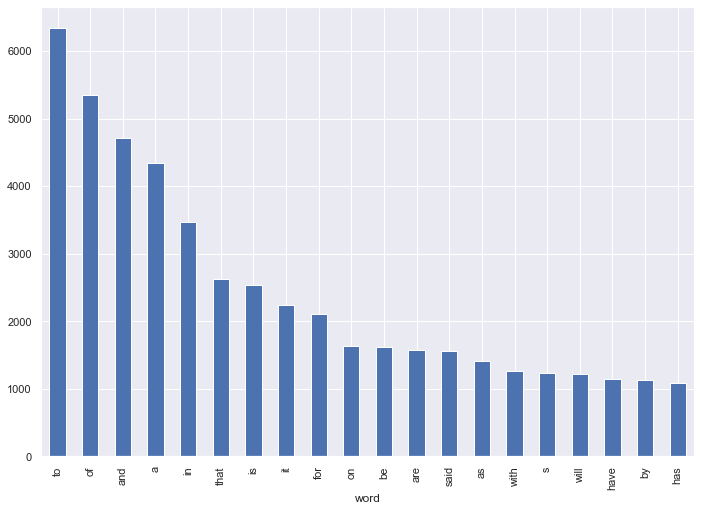

In [42]:
axes =  df_tech_before.plot.bar(x='word', y='count', legend=False)

# Text Pre-processing

In [43]:
import spacy
from spacy import displacy
nlp = spacy.load("en_core_web_sm")

def process_text(Text):
    """
    Lemmatizes the text and removes stopwords.
    """
    doc = nlp(Text)
    return ' '.join([token.lemma_ for token in doc if not token.is_stop])

In [44]:
# Apply the function
data['Text'] = data['Text'].apply(process_text)

data.head()

,Category,Text,word_count
0,business,ad sale boost Time Warner profit \n\n Quarterl...,421
1,business,dollar gain Greenspan speech \n\n dollar hit h...,384
2,business,Yukos unit buyer face loan claim \n\n owner em...,264
3,business,high fuel price hit BA profit \n\n British Air...,406
4,business,pernod takeover talk lift Domecq \n\n Shares U...,265


In [45]:
#Html tag removal
def perform_html_cleanup(raw_review ):
  # 1. Remove HTML
  review_text = BeautifulSoup(raw_review).get_text()
  return review_text

#Replace Contraction
def replace_contractions(raw_review):
    #Replace contractions in raw_review
    return contractions.fix(raw_review)

#Tokenization
def perform_tokenization(raw_review ):
   word_tokens = word_tokenize(raw_review)  # Tokenization
   return word_tokens

#Removal of Numbers
def remove_numbers(list_of_words): 
    pattern = '[0-9]'
    list = [re.sub(pattern, '', i) for i in list_of_words] 
    return list

#Remove special characters
def remove_special_character_punctuation(list_of_words): 
    pattern = '[^A-Za-z0-9]+'
    list = [re.sub(pattern, '', i) for i in list_of_words] 
    return list

#Remove punctuations
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)    # Append processed words to new list.
    return new_words


#Conversion to Lower case
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = word.lower()           # Converting to lowercase
        new_words.append(new_word)        # Append processed words to new list.
    return new_words



#Remove empty String
def remove_empty_string(words):
  return list(filter(None, words))


#Stemming
def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []                            # Create empty list to store pre-processed words.
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)                # Append processed words to new list.
    return stems


#Lemmatization
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []                           # Create empty list to store pre-processed words.
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)              # Append processed words to new list.
    return lemmas


In [46]:
def perform_cleanup(raw_review):
    clean_review = perform_html_cleanup(raw_review)
    clean_review = replace_contractions(clean_review)
    clean_review = perform_tokenization(clean_review)
    clean_review = remove_numbers(clean_review)
    clean_review = remove_special_character_punctuation(clean_review)
    clean_review = remove_punctuation(clean_review)
    clean_review  = to_lowercase(clean_review)
    clean_review = remove_empty_string(clean_review)
    #clean_review = stem_words(clean_review)
    clean_review = lemmatize_verbs(clean_review)
    return clean_review

In [47]:
data.head()

,Category,Text,word_count
0,business,ad sale boost Time Warner profit \n\n Quarterl...,421
1,business,dollar gain Greenspan speech \n\n dollar hit h...,384
2,business,Yukos unit buyer face loan claim \n\n owner em...,264
3,business,high fuel price hit BA profit \n\n British Air...,406
4,business,pernod takeover talk lift Domecq \n\n Shares U...,265


In [48]:
clean_reviews = []

for i, row in data.iterrows():
    words = data.at[i, 'Text']
    words = perform_cleanup(words)
    data.at[i,'Text'] = " ".join( words )
    clean_reviews.append(data.at[i, 'Text'] )
data.head()

,Category,Text,word_count
0,business,ad sale boost time warner profit quarterly pro...,421
1,business,dollar gain greenspan speech dollar hit high l...,384
2,business,yukos unit buyer face loan claim owner embattl...,264
3,business,high fuel price hit ba profit british airways ...,406
4,business,pernod takeover talk lift domecq share uk drin...,265


# TF-IDF Vectorization

In [49]:
# Initialize the "TfidfVectorizer" object
# Convert a collection of raw documents to a matrix of TF-IDF features.
tfidf_vectorizer = TfidfVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 500,
                             min_df=5, 
                             max_df=0.7,
                             ngram_range=(1,2)) 

# Fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
tfidf_vectorizer_data_features = tfidf_vectorizer.fit_transform(clean_reviews)

# Convert to Numpy arrays

tfidf_vectorizer_data_features = tfidf_vectorizer_data_features.toarray()

In [50]:
print (tfidf_vectorizer_data_features.shape)
print(tfidf_vectorizer_data_features)

(2225, 500)
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.71351363]
 ...
 [0.         0.         0.03528046 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.02260656 0.02644487 0.01035692 ... 0.         0.01245636 0.        ]]


In [51]:
#Review words
tfidf_vectorizer_vocab = tfidf_vectorizer.get_feature_names_out()
print (tfidf_vectorizer_vocab)

['able' 'access' 'accord' 'account' 'act' 'action' 'actor' 'add' 'age'
 'ago' 'agree' 'ahead' 'aid' 'aim' 'album' 'allow' 'american' 'analyst'
 'announce' 'anti' 'appear' 'apple' 'area' 'argue' 'ask' 'attack'
 'attempt' 'available' 'award' 'away' 'back' 'bad' 'ban' 'band' 'bank'
 'base' 'bbc' 'beat' 'begin' 'believe' 'bid' 'big' 'bill' 'black' 'blair'
 'bn' 'book' 'boost' 'boss' 'box' 'break' 'bring' 'britain' 'british'
 'broadband' 'brown' 'budget' 'build' 'business' 'buy' 'call' 'campaign'
 'car' 'card' 'career' 'case' 'cash' 'centre' 'chairman' 'challenge'
 'champion' 'chance' 'chancellor' 'change' 'charge' 'chart' 'chelsea'
 'chief' 'chief executive' 'child' 'china' 'choice' 'city' 'claim' 'clear'
 'close' 'club' 'coach' 'come' 'comment' 'commission' 'committee'
 'company' 'competition' 'computer' 'concern' 'consider' 'consumer'
 'content' 'continue' 'control' 'cost' 'council' 'country' 'court'
 'create' 'cup' 'current' 'currently' 'customer' 'cut' 'date' 'datum'
 'david' 'day' 'de

In [52]:
tfidf_vectorizer_stop_words = tfidf_vectorizer.get_stop_words()
print (tfidf_vectorizer_stop_words)

None


In [53]:
# Sum up the counts of each vocabulary word
tf_df_dist = np.sum(tfidf_vectorizer_data_features, axis=0)

# For each, print the vocabulary word and the number of times it 
# appears in the training set
for tag, count in zip(tfidf_vectorizer_vocab, tf_df_dist):
    print (count, tag)

18.4029909785706 able
15.969712258823343 access
22.76087071930267 accord
18.058305269332973 account
20.948978962960826 act
24.928884807554514 action
21.964325264632556 actor
44.65732562532813 add
18.468446509609446 age
17.123766448359827 ago
19.788365005188634 agree
18.40589753820433 ahead
18.293011570647785 aid
15.582663546336 aim
20.551429469687758 album
23.025527924548527 allow
19.873692828229533 american
24.856423157513802 analyst
21.103937405612886 announce
19.426938296333265 anti
18.097567797721577 appear
12.63075793892161 apple
17.406065751842654 area
12.888922675829848 argue
22.004695556579048 ask
22.575922615984865 attack
13.684727340216853 attempt
14.10796134493371 available
46.77554326005047 award
19.62256599609105 away
13.389820439411684 back
16.151372087987703 bad
19.99203280192109 ban
23.571747107927862 band
36.28846295446979 bank
25.792530078304374 base
38.86824740514113 bbc
26.217440291983625 beat
21.557005645138094 begin
29.05434912943651 believe
23.110316236631864 bid

In [54]:
x_tf_idf = tfidf_vectorizer_data_features     # Predictor feature columns
y_tf_idf = data['Category']   # Predicted class

x_train_tf_idf, x_test_tf_idf, y_train_tf_idf, y_test_tf_idf = train_test_split(x_tf_idf, y_tf_idf, test_size=0.3, random_state=1)

In [55]:
print(x_train_tf_idf.shape)
print(y_train_tf_idf.shape)
print(x_test_tf_idf.shape)
print(y_test_tf_idf.shape)

(1557, 500)
(1557,)
(668, 500)
(668,)


# Initialize RandomForestClassifier

In [56]:
# Dividing the test data into test and validation set in 50-50 ratio
x_validation_tf_idf, x_test_main_tf_idf, y_validation_tf_idf, y_test_main_tf_idf = train_test_split(x_test_tf_idf, y_test_tf_idf, test_size=0.50, random_state=1)

print(x_validation_tf_idf.shape)
print(x_test_main_tf_idf.shape)


print(y_validation_tf_idf.shape)
print(y_test_main_tf_idf.shape)


(334, 500)
(334, 500)
(334,)
(334,)


In [57]:
# Initialize a Random Forest classifier with 100 trees
randomforestclassifier_tf_idf = RandomForestClassifier(verbose=1,n_jobs=-1,n_estimators = 100) 
# Fit the forest to the training set

print ("Training the random forest...")
randomforestclassifier_tf_idf = randomforestclassifier_tf_idf.fit( x_train_tf_idf, y_train_tf_idf)

Training the random forest...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [58]:
#
randomforestclassifier_tf_idf.score(x_train_tf_idf, y_train_tf_idf)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


1.0

# Evaluate score by cross-validation

In [59]:
print (np.mean(cross_val_score(randomforestclassifier_tf_idf,x_train_tf_idf, y_train_tf_idf,cv=10)))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]:

0.9447559966914806


[Parallel(n_jobs=-1)]: Done  85 out of 100 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


# PREDICT

In [60]:
# Make class predictions for the Validation set
y_validation_predict_tf_idf= randomforestclassifier_tf_idf.predict(x_validation_tf_idf)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


# Training and Validation Accuracy

In [61]:
print("Trainig accuracy",randomforestclassifier_tf_idf.score(x_train_tf_idf,y_train_tf_idf))  
print()
print("Validation accuracy",randomforestclassifier_tf_idf.score(x_validation_tf_idf, y_validation_tf_idf))
print()

Trainig accuracy 1.0

Validation accuracy 0.9491017964071856



[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


# Classification Report (Validation Set)

In [62]:
print(metrics.classification_report(y_validation_tf_idf,y_validation_predict_tf_idf))

               precision    recall  f1-score   support

     business       0.89      0.97      0.93        70
entertainment       0.97      0.91      0.94        64
     politics       0.98      0.94      0.96        65
        sport       0.96      0.99      0.97        73
         tech       0.95      0.94      0.94        62

     accuracy                           0.95       334
    macro avg       0.95      0.95      0.95       334
 weighted avg       0.95      0.95      0.95       334



# Confusion Matrix (Validation Set)

<Figure size 842.4x595.44 with 0 Axes>

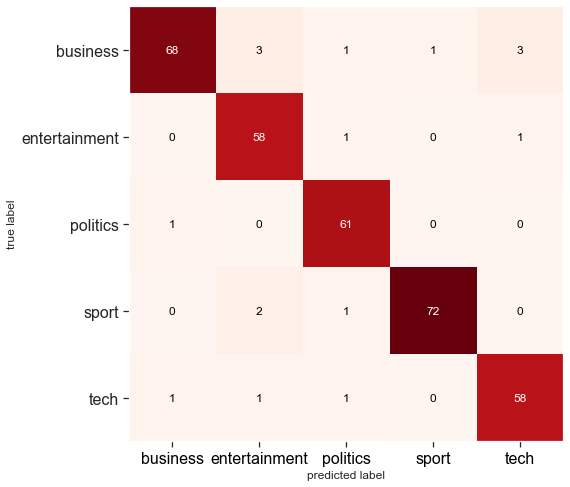

In [63]:
cm=confusion_matrix(y_validation_predict_tf_idf , y_validation_tf_idf)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
plt.xticks(range(5), ['business', 'entertainment', 'politics', 'sport', 'tech'], fontsize=16,color='black')
plt.yticks(range(5), ['business', 'entertainment', 'politics', 'sport', 'tech'], fontsize=16)
plt.show()

# Test Accuracy

In [64]:
print("Test accuracy",randomforestclassifier_tf_idf.score(x_test_main_tf_idf, y_test_main_tf_idf))
print()

Test accuracy 0.9700598802395209



[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


# Classification Report (Test Set)

In [65]:
# Make class predictions for the test set
y_test_predict_tf_idf= randomforestclassifier_tf_idf.predict(x_test_main_tf_idf)
print(metrics.classification_report(y_test_main_tf_idf,y_test_predict_tf_idf))

               precision    recall  f1-score   support

     business       0.97      0.97      0.97        73
entertainment       0.98      0.94      0.96        63
     politics       0.98      0.97      0.97        60
        sport       0.95      0.99      0.97        73
         tech       0.97      0.98      0.98        65

     accuracy                           0.97       334
    macro avg       0.97      0.97      0.97       334
 weighted avg       0.97      0.97      0.97       334



[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


# Confusion Matrix (Test Set)

<Figure size 842.4x595.44 with 0 Axes>

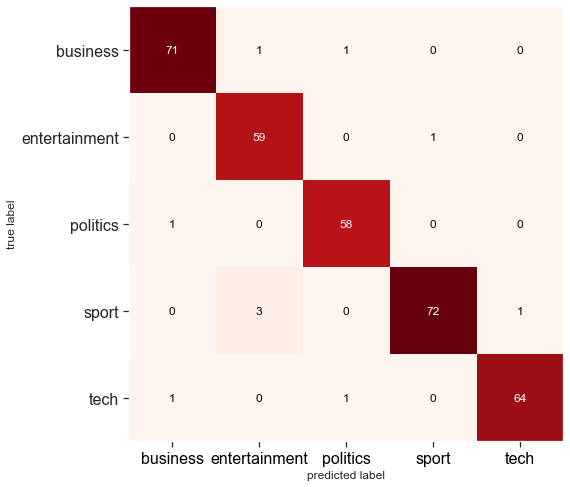

In [66]:
cm=confusion_matrix(y_test_predict_tf_idf , y_test_main_tf_idf)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
plt.xticks(range(5), ['business', 'entertainment', 'politics', 'sport', 'tech'], fontsize=16,color='black')
plt.yticks(range(5), ['business', 'entertainment', 'politics', 'sport', 'tech'], fontsize=16)
plt.show()